In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
#
from scipy.linalg import solve_banded

# Define domain and parameters
nx = 100
ntimes = 300
xmax = 1. # the distance across the domain
endtime = 2. # the time it takes for water to flow across the domain, 2 flow times
dt = endtime/(ntimes-1.)
dx = xmax/(nx-1.)
Pe = 50. #50 is relatively dispersive

# Creating A array
A_upper = dt*(1./(4*dx) - 1./(2.*Pe*dx**2))*ones(nx-2)
A_mid = (1. + dt/(Pe*dx**2))*ones(nx-2)
A_lower = dt*(-1./(4*dx) - 1./(2.*Pe*dx**2))*ones(nx-2)
A_upper[0] = 0.
A_lower[-1] = 0.
A = vstack((A_upper, A_mid, A_lower))

# Creating concentration array and set boundary conditions
C = zeros([ntimes, nx])
C_up = 1.
C_down = 0.
C[:,0] = C_up #set upstream boundary concentration
C[:,-1] = C_down # set downstream boundary concentration

# for loop
for n in arange(ntimes-1):
    b = C[n,1:-1]*(1. - dt/(Pe*dx**2)) \
        + C[n,2:]*dt*(-1./(4.*dx) + 1./(2.*Pe*dx**2)) \
        + C[n,0:-2]*dt*(1./(4.*dx) + 1./(2.*Pe*dx**2))
    b[0] += C_up*dt*(1./(4.*dx) + 1./(2.*Pe*dx**2))
    b[-1] += C_down*dt*(-1./(4.*dx) + 1./(2.*Pe*dx**2))
    C[n+1,1:-1] = solve_banded((1,1), A, b)

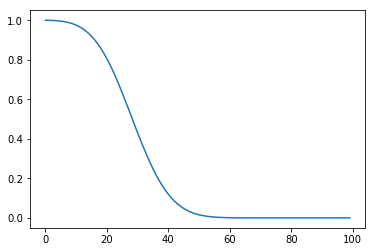

In [19]:
#for n in [2,5,10,50,99]
plot(C[40,:])
#plot(C[30,:])
#plot(C[60,:])

In [22]:
# with a different boundary conditions:

from scipy.linalg import solve_banded

# Define domain and parameters
nx = 100
ntimes = 300
xmax = 1. # the distance across the domain
endtime = 2. # the time it takes for water to flow across the domain, 2 flow times
dt = endtime/(ntimes-1.)
dx = xmax/(nx-1.)
Pe = 50. #50 is relatively dispersive

# Creating A array

A_upper = dt*(1./(4*dx) - 1./(2.*Pe*dx**2))*ones(nx-1) # add one number to add a row
A_mid = (1. + dt/(Pe*dx**2))*ones(nx-1)
A_lower = dt*(-1./(4*dx) - 1./(2.*Pe*dx**2))*ones(nx-1)
A_upper[0] = 0.
A_lower[-1] = 0.
# reset of ...
A_mid[-1] = 1.+dt/(2.*dt)
A_lower[-2] = -dt/(2.*dx)

A = vstack((A_upper, A_mid, A_lower))

# Creating concentration array and set boundary conditions
C = zeros([ntimes, nx])
C_up = 1.
C_down = 0.
C[:,0] = C_up #set upstream boundary concentration
C[:,-1] = C_down # set downstream boundary concentration

b = zeros(nx-1) # create matrice with the right number of elements
# for loop
for n in arange(ntimes-1):
    b[:-1] = C[n,1:-1]*(1. - dt/(Pe*dx**2)) \
        + C[n,2:]*dt*(-1./(4.*dx) + 1./(2.*Pe*dx**2)) \
        + C[n,0:-2]*dt*(1./(4.*dx) + 1./(2.*Pe*dx**2))
    b[0] += C_up*dt*(1./(4.*dx) + 1./(2.*Pe*dx**2))
    b[-1] = C[n,-1]*(1.-dt/(2.*dx)) + C[n,-2]*(dt/(2.*dx)) # no more fixed concentration downstream
    C[n+1,1:] = solve_banded((1,1), A, b)

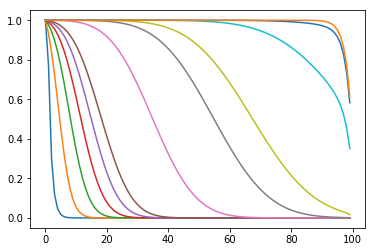

In [28]:
figure()
for n in [1,5,10,15,20,25,50,80,99,150,200,299]:
    plot(C[n,:])

In [35]:
# with a different boundary conditions:

from scipy.linalg import solve_banded

# Define domain and parameters
nx = 100
ntimes = 300
xmax = 1. # the distance across the domain
endtime = 2. # the time it takes for water to flow across the domain, 2 flow times
dt = endtime/(ntimes-1.)
dx = xmax/(nx-1.)
Pe = 50. #50 is relatively dispersive

# Creating A array

A_upper = dt*(1./(4*dx) - 1./(2.*Pe*dx**2))*ones(nx-1) # add one number to add a row
A_mid = (1. + dt/(Pe*dx**2))*ones(nx-1)
A_lower = dt*(-1./(4*dx) - 1./(2.*Pe*dx**2))*ones(nx-1)
A_upper[0] = 0.
A_lower[-1] = 0.
# reset of ...
A_mid[-1] = 1.+dt/(2.*dt)
A_lower[-2] = -dt/(2.*dx)

A = vstack((A_upper, A_mid, A_lower))

# Creating concentration array and set boundary conditions
C = zeros([ntimes, nx])
C_up = 1.
C_down = 0.
C[:,0] = C_up #set upstream boundary concentration
C[:,-1] = C_down # set downstream boundary concentration

b = zeros(nx-1) # create matrice with the right number of elements
# for loop
for n in arange(ntimes-1):
    if n>5:
        C_up =0.
        C[5:,0] =0.
    b[:-1] = C[n,1:-1]*(1. - dt/(Pe*dx**2)) \
        + C[n,2:]*dt*(-1./(4.*dx) + 1./(2.*Pe*dx**2)) \
        + C[n,0:-2]*dt*(1./(4.*dx) + 1./(2.*Pe*dx**2))
    b[0] += C_up*dt*(1./(4.*dx) + 1./(2.*Pe*dx**2))
    b[-1] = C[n,-1]*(1.-dt/(2.*dx)) + C[n,-2]*(dt/(2.*dx)) # no more fixed concentration downstream
    C[n+1,1:] = solve_banded((1,1), A, b)

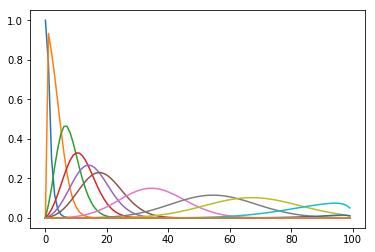

In [36]:
figure()
for n in [1,5,10,15,20,25,50,80,99,150,200,299]:
    plot(C[n,:])